<a href="https://colab.research.google.com/github/smartinternz02/SI-GuidedProject-581266-1694713375/blob/main/assignment_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Import the Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

Importing the Dataset

In [2]:
dataset= pd.read_csv("Titanic-Dataset.csv")
dataset

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


Checking for Null values

In [3]:
dataset.isnull().any()

PassengerId    False
Survived       False
Pclass         False
Name           False
Sex            False
Age             True
SibSp          False
Parch          False
Ticket         False
Fare           False
Cabin           True
Embarked        True
dtype: bool

In [4]:
dataset.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [5]:
dataset = dataset.drop(columns=['Cabin'])

In [6]:
dataset = dataset.fillna(dataset["Age"].mean())

In [7]:
dataset = dataset.fillna(dataset["Embarked"].mode())

In [8]:
dataset.isnull().any()

PassengerId    False
Survived       False
Pclass         False
Name           False
Sex            False
Age            False
SibSp          False
Parch          False
Ticket         False
Fare           False
Embarked       False
dtype: bool

DataVisualization

<Axes: xlabel='Age', ylabel='Fare'>

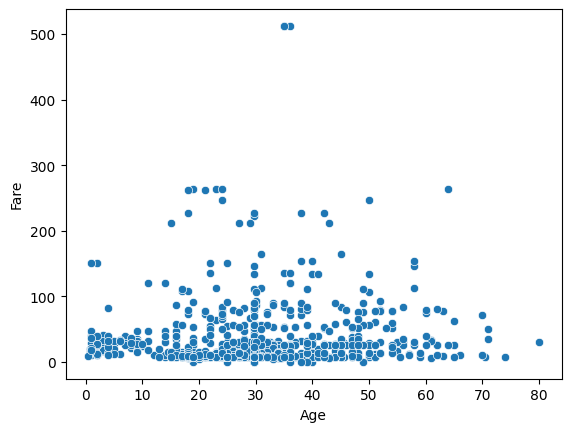

In [10]:
sns.scatterplot(data=dataset, x='Age', y='Fare')

<Axes: xlabel='Age', ylabel='Fare'>

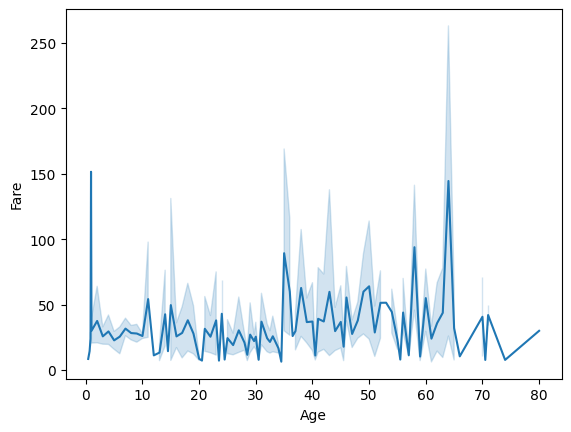

In [11]:
sns.lineplot(data=dataset, x='Age', y='Fare')

<ipython-input-12-8b65307f1274>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(dataset['Age'].dropna(), kde=False)


<Axes: xlabel='Age'>

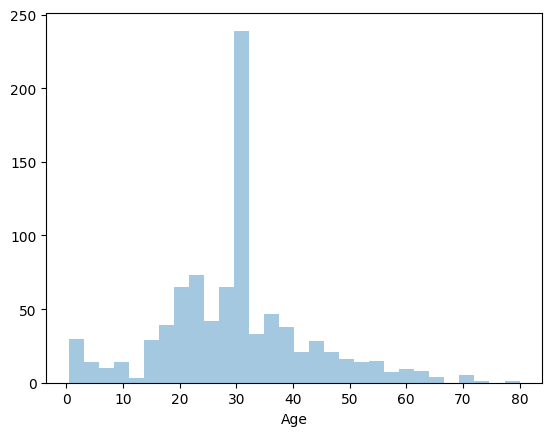

In [12]:
sns.distplot(dataset['Age'].dropna(), kde=False)

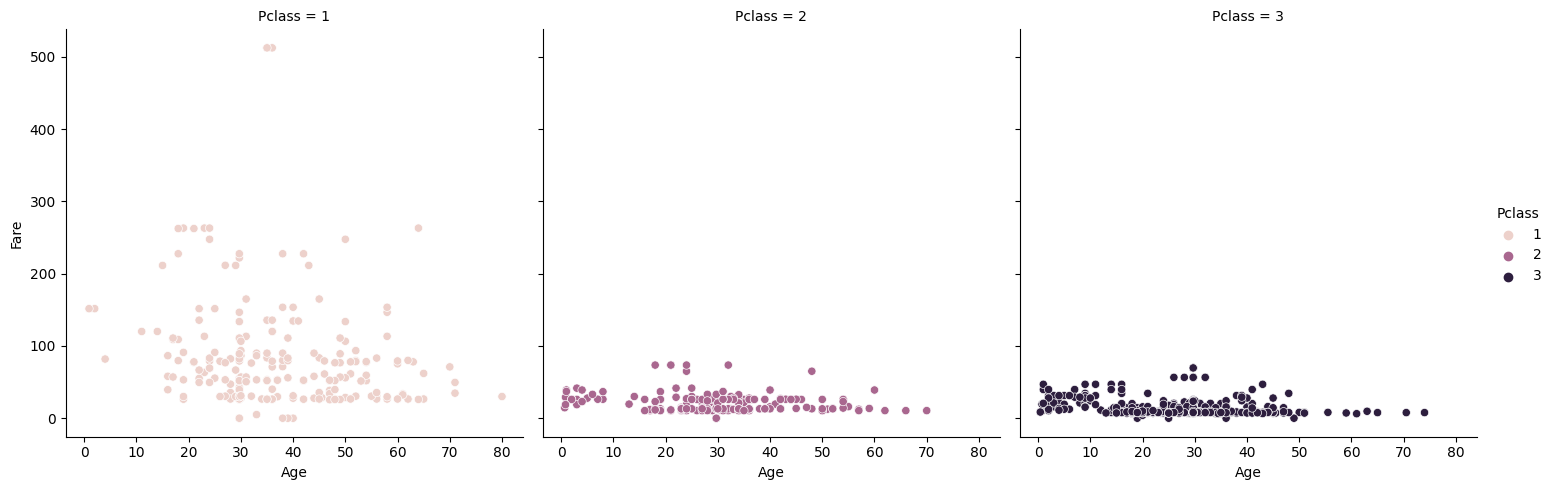

In [14]:
sns.relplot(data=dataset, x='Age', y='Fare', hue='Pclass', col='Pclass')

<ipython-input-16-25e24ece3af2>:1: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=dataset, x='Sex', y='Survived', ci=None)


<Axes: xlabel='Sex', ylabel='Survived'>

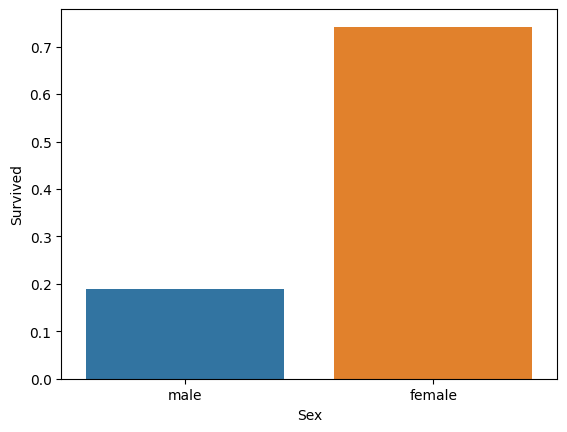

In [16]:
sns.barplot(data=dataset, x='Sex', y='Survived', ci=None)

<Axes: xlabel='Pclass', ylabel='count'>

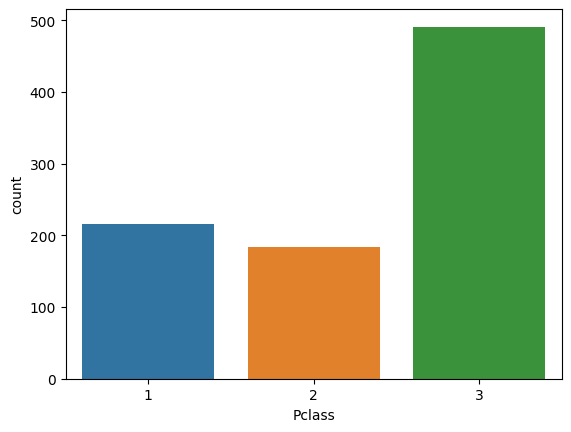

In [18]:
sns.countplot(data=dataset, x='Pclass')

<Axes: xlabel='Pclass', ylabel='Fare'>

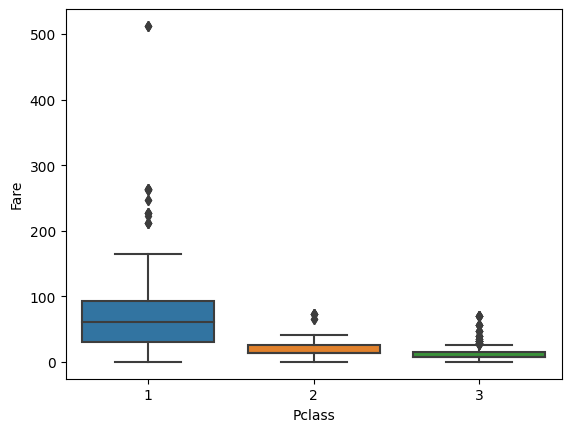

In [19]:
sns.boxplot(data=dataset, x='Pclass', y='Fare')

<ipython-input-21-3921e0565ba2>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = dataset.corr()


<Axes: >

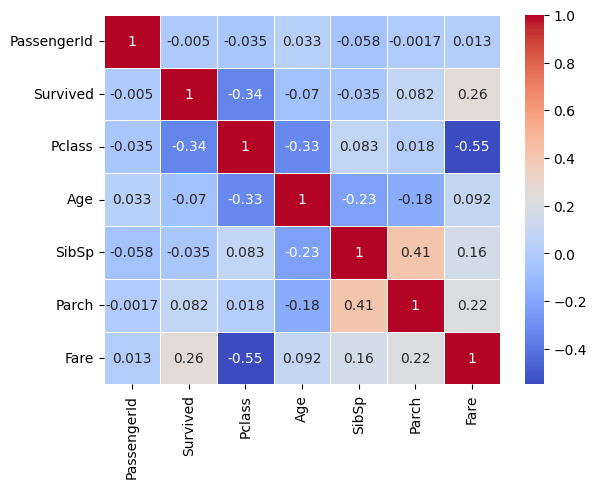

In [21]:
corr_matrix = dataset.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)

Outlier Detection

<Axes: >

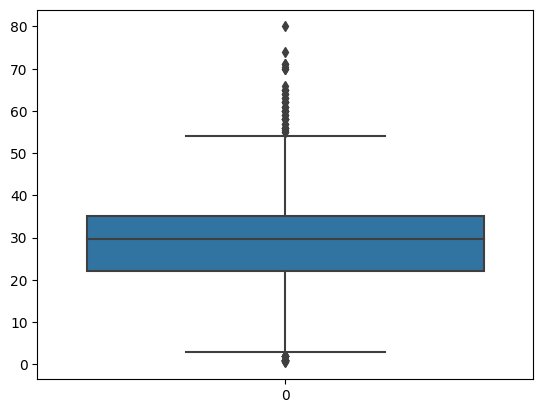

In [22]:
sns.boxplot(dataset['Age'])

<Axes: >

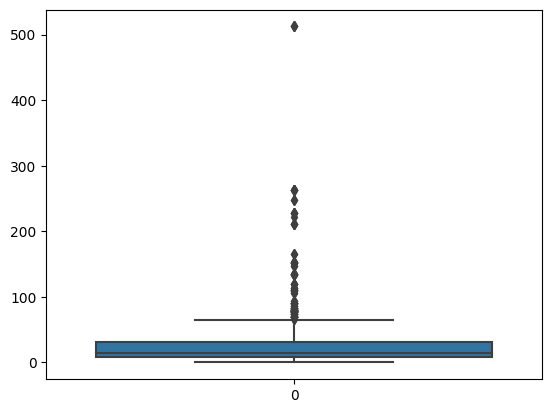

In [23]:
sns.boxplot(dataset['Fare'])

Splitting Dependent and Independent Variables

In [24]:
dataset.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [25]:
x = dataset.iloc[:, 2:] #Independent Variable
y = dataset.iloc[:, 1:2] #Dependent Variable

Encoding

In [26]:
dt = pd.get_dummies(dataset, columns=['Embarked'], prefix='Embarked')

In [27]:
dt

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked_29.69911764705882,Embarked_C,Embarked_Q,Embarked_S
0,1,0,3,"Braund, Mr. Owen Harris",male,22.000000,1,0,A/5 21171,7.2500,0,0,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000000,1,0,PC 17599,71.2833,0,1,0,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.000000,0,0,STON/O2. 3101282,7.9250,0,0,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000000,1,0,113803,53.1000,0,0,0,1
4,5,0,3,"Allen, Mr. William Henry",male,35.000000,0,0,373450,8.0500,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.000000,0,0,211536,13.0000,0,0,0,1
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.000000,0,0,112053,30.0000,0,0,0,1
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,29.699118,1,2,W./C. 6607,23.4500,0,0,0,1
889,890,1,1,"Behr, Mr. Karl Howell",male,26.000000,0,0,111369,30.0000,0,1,0,0


Feature Scaling

In [31]:
from sklearn.preprocessing import MinMaxScaler
ms=MinMaxScaler()

In [34]:
numeric_columns = x.select_dtypes(include=['number'])
X_scaled = ms.fit_transform(numeric_columns)

In [35]:
X_Scaled=pd.DataFrame(ms.fit_transform(numeric_columns),columns=numeric_columns.columns)

In [36]:
X_Scaled.head()

,Pclass,Age,SibSp,Parch,Fare
0,1.0,0.271174,0.125,0.0,0.014151
1,0.0,0.472229,0.125,0.0,0.139136
2,1.0,0.321438,0.000,0.0,0.015469
3,0.0,0.434531,0.125,0.0,0.103644
4,1.0,0.434531,0.000,0.0,0.015713


Splitting Data into Train and Test

In [38]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(X_Scaled,y,test_size =0.2,random_state =0)

In [39]:
print(x_train.shape,x_test.shape,y_train.shape,y_test.shape)

(712, 5) (179, 5) (712, 1) (179, 1)


In [40]:
from sklearn.linear_model import LinearRegression

In [41]:
lr=LinearRegression()

In [44]:
lr.fit(x_train,y_train)

LinearRegression()

In [45]:
y_pred=lr.predict(x_test)

In [46]:
y_pred

array([[ 0.24070021],
       [ 0.23634822],
       [ 0.30254507],
       [ 0.68118897],
       [ 0.34283675],
       [ 0.65405547],
       [ 0.64597137],
       [ 0.82373277],
       [ 0.68528767],
       [ 0.23614613],
       [ 0.22130452],
       [ 0.35586011],
       [ 0.23647421],
       [ 0.73409818],
       [ 0.73455809],
       [ 0.36691703],
       [ 0.29303788],
       [ 0.54718308],
       [ 0.19264073],
       [ 0.52803004],
       [ 0.53761955],
       [ 0.79425197],
       [ 0.23646634],
       [ 0.65437046],
       [ 0.30172848],
       [ 0.63598731],
       [ 0.21745782],
       [ 0.30041342],
       [ 0.53653805],
       [ 0.43716988],
       [ 0.20963607],
       [ 0.27123774],
       [ 0.25168739],
       [ 0.6572053 ],
       [ 0.19588102],
       [ 0.63494723],
       [ 0.12519482],
       [ 0.45394213],
       [ 0.48043128],
       [ 0.24022364],
       [ 0.43505534],
       [ 0.27516846],
       [ 0.24072648],
       [ 0.25106586],
       [ 0.59744984],
       [ 0

In [47]:
y_test

,Survived
495,0
648,0
278,0
31,1
255,1
...,...
780,1
837,0
215,1
833,0


In [48]:
dataset.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [49]:
from sklearn import metrics

In [50]:
print(metrics.r2_score(y_test,y_pred))

0.19578250502082062


In [51]:
print(metrics.mean_squared_error(y_test,y_pred))

0.1905062509563363


In [52]:
print(np.sqrt(metrics.mean_squared_error(y_test,y_pred)))

0.43647021771976185
